In [10]:
import cv2
import numpy as np
import tqdm
import tensorflow as tf
from random import shuffle
import matplotlib.pyplot as plt
import tflearn
import os
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression
import warnings
warnings.filterwarnings('ignore')



In [24]:
#defininng directories
train_dir='train'
test_dir='test'
img_size=50
lr=1e-3
model_name='Image classifier using cnn'

#one hot enocoding
def create_label(image_name):
    word_label=image_name.split('.')[-3]
    if word_label=='cat':
        return np.array([1,0])
    elif word_label=='dog':
        return np.array([0,1])
def create_train_data():
    training_data=[]
    for img in os.listdir(train_dir):
        path=os.path.join(train_dir,img)
        img_data=cv2.imread(path,0)
        img_data=cv2.resize(img_data,(img_size,img_size))
        training_data.append([np.array(img_data),create_label(img)])
    shuffle(training_data)
    np.save('train_data.npy',training_data)
    return training_data
def create_test_data():
    testing_data=[]
    for img in os.listdir(test_dir):
        path=os.path.join(test_dir,img)
        img_num=img.split('.')[0]
        img_data=cv2.imread(path,0)
        img_data=cv2.resize(img_data,(img_size,img_size))
        testing_data.append([np.array(img_data),img_num])
    shuffle(testing_data)
    np.save('test_data.npy',testing_data)
    return testing_data


#test_dadta=create_test_data




In [22]:
train_data=create_train_data()
test_data=create_test_data()


train=train_data[:-500]
test=test_data[-500:]

In [30]:
x_train=np.array([i[0] for i in train]).reshape(-1,img_size,img_size,1)
x_test=np.array([i[0] for i in test]) .reshape(-1,img_size,img_size,1)
y_train=[i[1] for i in train]
y_test=[i[1] for i in test]

tf.reset_default_graph()
convnet=input_data(shape=[None,img_size,img_size,1],name='input')
convnet=conv_2d(convnet,32,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,64,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,128,5,activation='relu')
convnet=max_pool_2d(convnet,5)

convnet=conv_2d(convnet,64,5,activation='relu')
convnet=max_pool_2d(convnet,5)

convnet=conv_2d(convnet,32,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=fully_connected(convnet,1024,activation='relu')
convnet=dropout(convnet,0.8)
convnet=fully_connected(convnet,2,activation='softmax')#2 for dog and cat
convnet=regression(convnet,optimizer='adam',learning_rate=lr,loss='categorical_crossentropy',name='targets')
model=tflearn.DNN(convnet,tensorboard_dir='log')


In [31]:
model.fit({'input':x_train},{'targets':y_train},n_epoch=5,validation_set=({'input':x_test},{'targets':y_test}),snapshot_step=500,show_metric=True,run_id=model_name)



Training Step: 382  | total loss: 0.58960 | time: 49.736s
| Adam | epoch: 001 | loss: 0.58960 - acc: 0.6876 -- iter: 24448/24500


ValueError: Cannot feed value of shape (64,) for Tensor 'targets/Y:0', which has shape '(?, 2)'

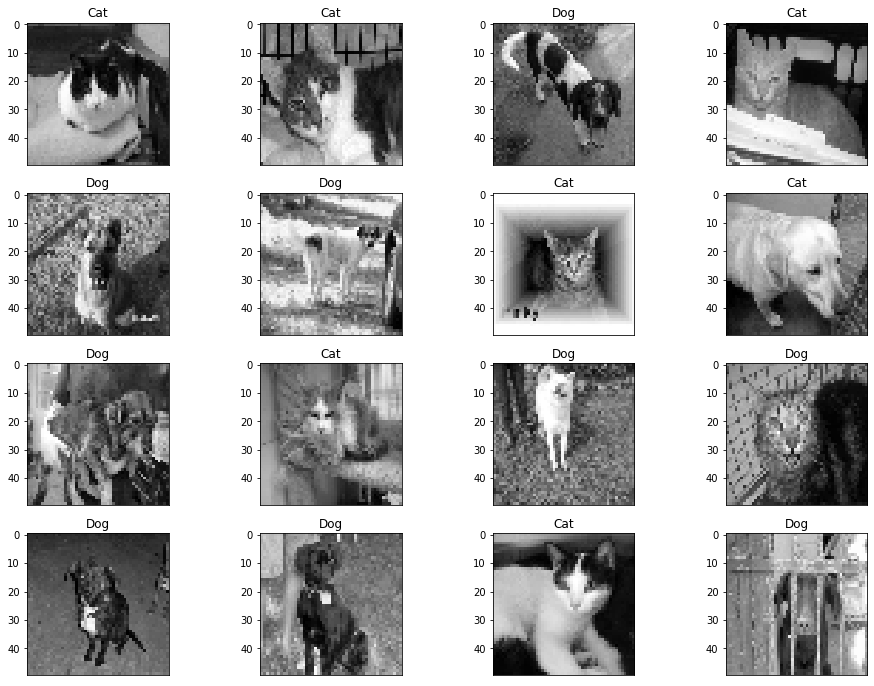

In [33]:
fig=plt.figure(figsize=(16,12))
for num,data in enumerate(test_data[:16]):
    img_num=data[1]
    img_data=data[0]
    y=fig.add_subplot(4,4,num+1)
    orig=img_data
    data=img_data.reshape(img_size,img_size,1)
    model_out=model.predict([data])[0]
    if np.argmax(model_out)==1:
        str_label='Dog'
    else:
        str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_xaxis().set_visible(False)
plt.show()

In [ ]:
a